In [35]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scienceplots
import itertools
import seaborn as sns

In [56]:
df = pd.read_csv('../results_2.csv')

In [57]:
df.head()

,transition_proba,skip,n_functions,n_cores,run,total_work,max_endtime,latency,hit_ratio
0,0.5,1,3,1,0,6545,998740,137204.0,98.835
1,0.5,1,3,1,1,6533,999460,124846.4,98.800
2,0.5,1,3,1,2,6581,999280,99134.0,99.375
3,0.5,1,3,1,3,6518,998830,72571.5,98.730
4,0.5,1,3,1,4,6551,998650,142080.0,98.620


In [58]:
n_functions = df.n_functions.unique()
transitions = df.transition_proba.unique()
skip_times = df.skip.unique()
n_cores = df.n_cores.unique()

In [59]:
dfs = {}
for t, s, c, f in itertools.product(transitions, skip_times, n_cores, n_functions):
    dfs[t,s,c,f] = df[(df.transition_proba == t) & (df.skip == s) & (df.n_cores == c) & (df.n_functions == f)]

def get_df(t,s,c,f):
    return df[(df.transition_proba == t) & (df.skip == s) & (df.n_cores == c) & (df.n_functions == f)]

In [60]:
n_cores

array([ 1,  4, 16, 32])

In [61]:
config = ['transition_proba','skip','n_functions','n_cores']
df_t = df.groupby(config).mean().reset_index()

In [62]:
endtime = df_t.max_endtime.max()
df_t['throughput'] = df_t.total_work * 1000 / endtime

In [63]:
df_t.head()

,transition_proba,skip,n_functions,n_cores,run,total_work,max_endtime,latency,hit_ratio,throughput
0,0.5,1,3,1,24.5,6559.16,999089.2,107910.466,99.1122,6.564217
1,0.5,1,3,4,24.5,6559.56,999089.2,101908.374,99.0629,6.564617
2,0.5,1,3,16,24.5,6561.66,999031.6,122598.828,99.2170,6.566719
3,0.5,1,3,32,24.5,6551.56,999092.8,104307.338,99.0323,6.556611
4,0.5,10,3,1,24.5,6556.62,999157.6,98759.404,99.0947,6.561675


/tmp/ipykernel_637798/2599461612.py:1: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.relplot(data=df_t, x='n_cores', y='throughput', hue='transition_proba', col='skip', row='n_functions', kind='line', markers=['x', 'o', 's', 'd'], palette=sns.color_palette("husl", 9))


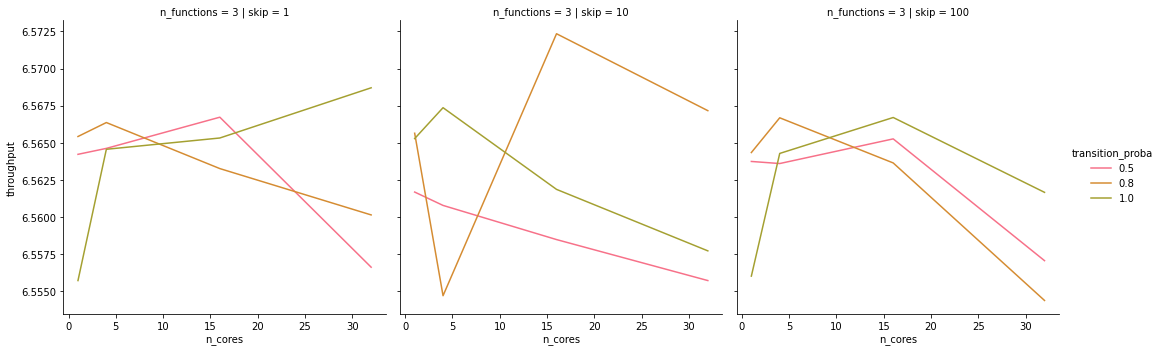

In [66]:
sns.relplot(data=df_t, x='n_cores', y='throughput', hue='transition_proba', col='skip', row='n_functions', kind='line', markers=['x', 'o', 's', 'd'], palette=sns.color_palette("husl", 9))
# plt.grid(True)

/tmp/ipykernel_637798/2920756224.py:1: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.relplot(data=df_t, x='n_cores', y='latency', hue='transition_proba', col='skip', row='n_functions', kind='line', markers=['x', 'o', 's', 'd'], palette=sns.color_palette("husl", 9))


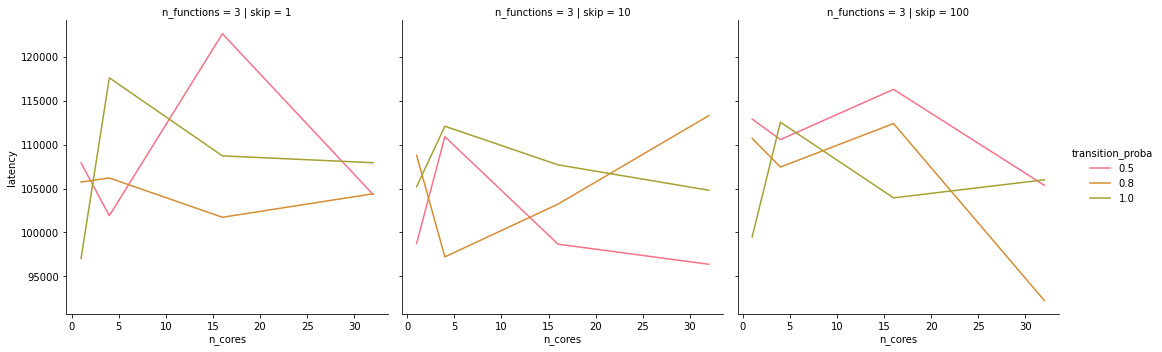

In [67]:
sns.relplot(data=df_t, x='n_cores', y='latency', hue='transition_proba', col='skip', row='n_functions', kind='line', markers=['x', 'o', 's', 'd'], palette=sns.color_palette("husl", 9))